
# Time Syncronization of DESI Telemetry Data

As is, the DESI telemetry data is spread out across multiple different tables. As is is shown in the correlations plots in the `correlation` folder, there us very weak correlation across different tables. Before proper analysis can be done, the several datatables of interest must 
be syncronized in time. This involves rebinning and interpolation of the data is currently being hosted by NERSC.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Image

## Load Data

In [2]:
tower_data = pd.read_pickle('../environmentmonitor_tower.pkl')
dome_data = pd.read_pickle('../environmentmonitor_dome.pkl')
telescope_data = pd.read_pickle('../environmentmonitor_telescope.pkl')
etc_seeing_data = pd.read_pickle('../etc_seeing.pkl')
etc_telemetry_data = pd.read_pickle('../etc_telemetry.pkl')
tcs_info_data = pd.read_pickle('../tcs_info.pkl')

## TODO: Sort Data

In [1]:
print(type(telescope_data['time_recorded'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
print(type(telescope_data['time_recorded'][0].to_pydatetime())) # tried converting pandas Timestamp to datetime object

<class 'datetime.datetime'>


## Data Visualization Before Syncrization

In [15]:
start_date = pd.Timestamp(year=2019,month=10,day=15,hour=0,minute=0,second=0,microsecond=0)
end_date = pd.Timestamp(year=2023,month=1,day=1,hour=0,minute=0,second=0,microsecond=0)
print(start_date)
print(end_date)
print(end_date-start_date)
assert(start_date<end_date)

2019-10-15 00:00:00
2023-01-01 00:00:00
1174 days 00:00:00


In [35]:
# Do the start dates of the tables match?
print(tower_data['time_recorded'][0])
print(dome_data['time_recorded'][0])
print(telescope_data['time_recorded'][0])

2020-08-13 18:47:10.476695+00:00
2019-09-18 21:56:19.520599+00:00
2022-06-10 16:37:05.419966+00:00


The start dates of different environment data tables is not consistant, 

In [30]:
print(type(start_date+pd.DateOffset(days=1)))
print(start_date+pd.DateOffset(days=1))

2019-12-16 00:00:00-07:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [16]:
print(len(telescope_data))
print(telescope_data['time_recorded'][len(telescope_data)-1])

18592072
2022-06-10 16:36:59.593400+00:00


In [37]:
start_date = pd.Timestamp(year=2021,month=12,day=15,hour=0,minute=0,second=0,microsecond=0, tz="America/Phoenix")
time_indicies = np.argwhere(np.logical_and(dome_data['time_recorded'].to_numpy() >= start_date, dome_data['time_recorded'].to_numpy() <= start_date+pd.DateOffset(days=1))).flatten()
print(len(time_indicies))
print(time_indicies)

29696
[[11739017]
 [11739018]
 [11739019]
 ...
 [11768710]
 [11768711]
 [11768712]]


In [80]:
def new_temperature_plot(year=2021,month=12,day=15, offset=1):
    start_date = pd.Timestamp(year=year,month=month,day=day,hour=12,minute=0,second=0,microsecond=0, tz="America/Phoenix")
    print(f'Start date: {start_date}')
    print(f'Offset length (# of days): {offset}')
    telescope_indicies = np.argwhere(np.logical_and(telescope_data['time_recorded'].to_numpy() >= start_date, telescope_data['time_recorded'].to_numpy() <= start_date+pd.DateOffset(days=offset))).flatten()
    print(f'Number of valid telescope samples in current time window: {len(telescope_indicies)}')
    tower_indicies = np.argwhere(np.logical_and(tower_data['time_recorded'].to_numpy() >= start_date, tower_data['time_recorded'].to_numpy() <= start_date+pd.DateOffset(days=offset))).flatten()
    print(f'Number of valid tower samples in current time window: {len(tower_indicies)}')
    # dome_indicies = np.argwhere(np.logical_and(dome_data['time_recorded'].to_numpy() >= start_date, dome_data['time_recorded'].to_numpy() <= start_date+pd.DateOffset(days=offset))).flatten()
    # print(f'Number of valid dome samples in current time window: {len(dome_indicies)}')
    etc_telemetry_indicies = np.argwhere(np.logical_and(etc_telemetry_data['time_recorded'].to_numpy() >= start_date, etc_telemetry_data['time_recorded'].to_numpy() <= start_date+pd.DateOffset(days=offset))).flatten()
    print(f'Number of valid etc telemetry samples in current time window: {len(etc_telemetry_indicies)}')

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    
    ax[0].plot(telescope_data['time_recorded'][telescope_indicies], telescope_data['mirror_temp'][telescope_indicies], color='orange', label='mirror temp')
    ax[0].plot(telescope_data['time_recorded'][telescope_indicies], telescope_data['mirror_avg_temp'][telescope_indicies], color='blue', label='average mirror temp')
    ax[0].plot(telescope_data['time_recorded'][telescope_indicies], telescope_data['mirror_desired_temp'][telescope_indicies], color='green', label='desired mirror temp')
    ax[0].plot(tower_data['time_recorded'][tower_indicies], tower_data['temperature'][tower_indicies], color='red', label='mountain temp')
    ax[0].autoscale(True)
    ax[0].set_ylabel('Temperature (Celcius)')
    ax[0].set_xlabel('Date/Time (MM-DD HH)')
    ax[0].set_title('Temperature (Celcius) vs. Date & Time (MM-DD HH)')
    ax[0].legend()
    
    ax[1].plot(etc_telemetry_data['time_recorded'][etc_telemetry_indicies], etc_telemetry_data['seeing'][etc_telemetry_indicies], color='purple', label='seeing')
    ax[1].autoscale(True)
    ax[1].set_ylabel('Seeing')
    ax[1].set_xlabel('Date/Time (MM-DD HH)')
    ax[1].set_title('Seeing vs. Date & Time (MM-DD HH)')
    ax[1].legend()
    
    plt.savefig(f'{year}-{month}-{day}.png')
    plt.xticks(rotation=45)
    plt.show()

Start date: 2022-06-10 12:00:00-07:00
Offset length (# of days): 3
Number of valid telescope samples in current time window: 44556
Number of valid tower samples in current time window: 44556
Number of valid etc telemetry samples in current time window: 27829


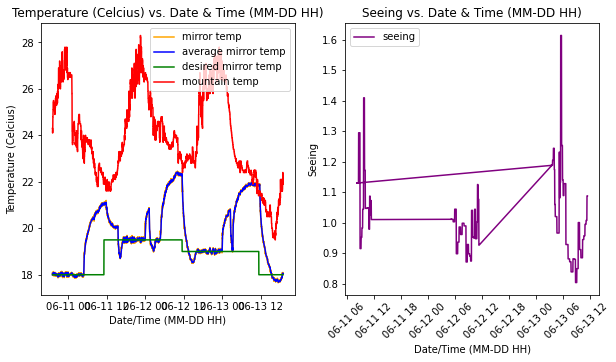

In [83]:
new_temperature_plot(year=2022,month=6,day=10, offset=3)

Start date: 2021-01-15 12:00:00-07:00
Offset length (# of days): 3
Number of valid telescope samples in current time window: 43990
Number of valid tower samples in current time window: 43989


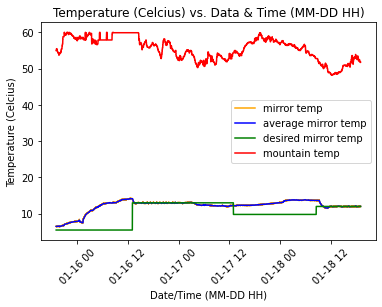

In [65]:
new_temperature_plot(year=2021,month=1,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=2,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=3,day=15, offset=3)

Start date: 2021-04-15 12:00:00-07:00
Offset length (# of days): 3
Number of valid telescope samples in current time window: 43977
Number of valid tower samples in current time window: 43978


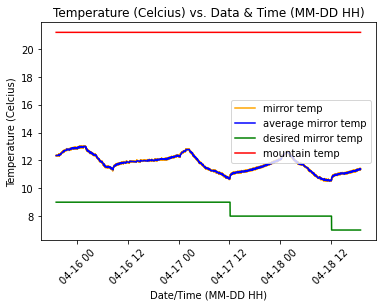

In [66]:
new_temperature_plot(year=2021,month=4,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=5,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=6,day=15, offset=3)

Start date: 2021-07-15 12:00:00-07:00
Offset length (# of days): 3
Number of valid telescope samples in current time window: 43456
Number of valid tower samples in current time window: 43456


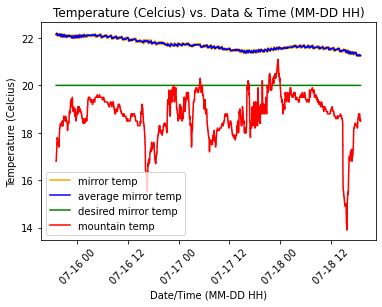

In [67]:
new_temperature_plot(year=2021,month=7,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=8,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=9,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=10,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=11,day=15, offset=3)

In [ ]:
new_temperature_plot(year=2021,month=12,day=15, offset=3)

In [57]:
print(etc_telemetry_data.columns.values)
print(etc_telemetry_data)

['time_recorded' 'seeing' 'transparency' 'skylevel']
                           time_recorded  seeing  transparency  skylevel
0       2020-04-22 14:35:59.250512+00:00   1.000        0.8000   21.0000
1       2020-04-22 14:36:18.293636+00:00   0.990        0.7900   21.0100
2       2020-04-22 14:36:21.301450+00:00   0.980        0.7800   21.0000
3       2020-04-22 14:36:24.309174+00:00   0.990        0.7700   20.9900
4       2020-04-22 14:36:27.313193+00:00   0.980        0.7800   21.0000
...                                  ...     ...           ...       ...
5243471 2022-12-24 05:28:59.901266+00:00   1.063        1.0268    1.2956
5243472 2022-12-24 05:29:01.912410+00:00   1.063        1.0268    1.2956
5243473 2022-12-24 05:29:03.923748+00:00   1.063        1.0268    1.2956
5243474 2022-12-24 05:29:06.032298+00:00   1.063        1.0250    1.2956
5243475 2022-12-24 05:29:08.043615+00:00   1.063        1.0250    1.2956

[5243476 rows x 4 columns]


In [ ]:
display(Image(filename='../correlation/temp_corr_before_sync.png'))

## Unsuccessful sorting and array modification

In [ ]:
print(min(telescope_data['time_recorded'][start_index+count]))

In [ ]:
print(telescope_data['time_recorded'].to_pydatetime()) # tried converting array of pandas Timestamp to datetime objects

In [35]:
print(telescope_data['time_recorded'][0].to_pydatetime()) # tried converting array of pandas Timestamp to datetime objects

2022-06-10 16:37:05.419966+00:00


In [12]:
print(telescope_data['time_recorded'].apply(lambda x: x.to_pydatetime())) # tried converting array of pandas Timestamp to datetime objects

0          2022-06-10 16:37:05.419966+00:00
1          2022-06-10 16:37:11.246032+00:00
2          2022-06-10 16:37:17.071908+00:00
3          2022-06-10 16:37:22.905860+00:00
4          2022-06-10 16:37:28.732455+00:00
                         ...               
18592067   2022-06-10 16:36:36.337487+00:00
18592068   2022-06-10 16:36:42.153776+00:00
18592069   2022-06-10 16:36:47.957402+00:00
18592070   2022-06-10 16:36:53.778196+00:00
18592071   2022-06-10 16:36:59.593400+00:00
Name: time_recorded, Length: 18592072, dtype: datetime64[ns, psycopg2.tz.FixedOffsetTimezone(offset=0, name=None)]


In [ ]:
telescope_data['time_recorded'] = telescope_data.assign(time_recored=lambda x: x['time_recorded'].to_pydatetime()) # save time conversion array and display
print(type(telescope_data['time_recorded'][0]))

In [17]:
print(type(sorted_tower_data.sort_values()[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [15]:
print(type(telescope_data['time_recorded'].apply(lambda x: x.to_pydatetime())[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
assert(tower_data['time_recorded']==tower_data.sort_values(['time_recorded'])['time_recorded'])
assert(tower_data['time_recorded']==tower_data.sort_values(['time_recorded'])['time_recorded'])

Here, we see strong correlation amongst all the columns related to the dome. However, the mirror-related quantities are not strongly correlated. We would expect the mirror temperature to rise along with the temperature inside the dome. 

In [ ]:
print('initial number of samples per table')
print(f'environmentmonitor_tower: {len(tower_data.index)}')
print(f'environmentmonitor_dome: {len(dome_data.index)}')
print(f'environmentmonitor_telescope: {len(telescope_data.index)}')
print(f'etc_seeing: {len(etc_seeing_data.index)}')
print(f'etc_telemetry: {len(etc_telemetry_data.index)}')
print(f'tcs_info: {len(tcs_info_data.index)}')

In [ ]:
# fig, ax = plt.subplots(ncols=4, figsize=(40,10))

# ax[0].scatter(tower_data['time_recorded'], tower_data['temperature'])
# ax[0].set_xlabel('time_recorded')
# ax[0].set_ylabel('temperature')

# ax[1].scatter(telescope_data['time_recorded'], telescope_data['mirror_avg_temp'])
# ax[1].set_xlabel('time_recorded')
# ax[1].set_ylabel('mirror_avg_temp')

# ax[2].scatter(telescope_data['time_recorded'], telescope_data['mirror_desired_temp'])
# ax[2].set_xlabel('time_recorded')
# ax[2].set_ylabel('mirror_desired_temp')

# ax[3].scatter(etc_telemetry['time_recorded'], etc_telemetry['seeing'])
# ax[3].set_xlabel('time_recorded')
# ax[3].set_ylabel('seeing')

# plt.savefig('seeing_vs_time.png')
# plt.show()